<a href="https://colab.research.google.com/github/EvgeniaKantor/DI-Bootcamp_ML/blob/main/dchW4D4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
from scipy.stats import skew, kurtosis
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import pearsonr

# Data Loading and Exploration,  Cleaning and Preprocessing

In [2]:
url = 'https://raw.githubusercontent.com/devtlv/DailyChallenge-DataAnalysis-W6D5-Mobile_Price_Classification/main/train.csv'
df = pd.read_csv(url)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
df.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


0) battery_power: The battery power of the mobile phone, typically measured in mAh (milliampere-hour). It represents the capacity of the battery and determines how long the phone can last on a single charge.

1) blue: A binary feature indicating whether the phone supports Bluetooth connectivity. It has a value of 1 if Bluetooth is supported and 0 if not.

2) clock_speed: The speed of the processor clock, usually measured in GHz (gigahertz). It indicates how quickly the processor can execute instructions.

3) dual_sim: A binary feature indicating whether the phone has dual SIM card support. It has a value of 1 if dual SIM support is available and 0 if not.

4) fc: The primary camera resolution of the phone, measured in megapixels (MP). It represents the quality and resolution of the photos captured by the phone's primary camera.

5) four_g: A binary feature indicating whether the phone supports 4G network connectivity. It has a value of 1 if 4G is supported and 0 if not.

6) int_memory: The internal memory (RAM) of the phone, typically measured in gigabytes (GB). It represents the amount of memory available for storing apps, data, and other files.

7) m_dep: The mobile depth or thickness of the phone, usually measured in centimeters (cm). It indicates how slim or thick the phone is.

8) mobile_wt: The weight of the phone, usually measured in grams (g). It represents the physical weight of the device.

9) n_cores: The number of processor cores in the phone's CPU (Central Processing Unit). It indicates the multitasking capabilities and overall performance of the processor.

10) pc: The pixel resolution of the phone's secondary camera, measured in megapixels (MP). It represents the quality and resolution of the photos captured by the phone's secondary (front-facing) camera.

11) px_height: The height of the phone's display screen in pixels. It represents the vertical resolution of the screen.

12) px_width: The width of the phone's display screen in pixels. It represents the horizontal resolution of the screen.

13) ram: The Random Access Memory (RAM) of the phone, usually measured in gigabytes (GB). It represents the amount of memory available for running apps and processes.

14) sc_h: The height of the phone's screen in centimeters (cm). It represents the physical height of the display screen.

15) sc_w: The width of the phone's screen in centimeters (cm). It represents the physical width of the display screen.

16) talk_time: The talk time of the phone, typically measured in hours. It represents the maximum duration for which the phone can be used for voice calls on a single charge.

17) three_g: A binary feature indicating whether the phone supports 3G network connectivity. It has a value of 1 if 3G is supported and 0 if not.

18) touch_screen: A binary feature indicating whether the phone has a touchscreen display. It has a value of 1 if the phone has a touchscreen and 0 if not.

19) wifi: A binary feature indicating whether the phone supports Wi-Fi connectivity. It has a value of 1 if Wi-Fi is supported and 0 if not.

20) price_range: The price range category of the mobile phone, which typically categorizes phones into different price brackets or tiers. It's often used as the target variable for machine learning models predicting the price range of a phone based on its features.

# Statistical Analysis with NumPy and SciPy

In [5]:
summary_stats = df.describe().T
summary_stats['median'] = df.median()
summary_stats['variance'] = df.var()
summary_stats

,count,mean,std,min,25%,50%,75%,max,median,variance
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0,1226.0,1.930884e+05
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0,0.0,2.501001e-01
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0,1.5,6.658629e-01
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0,1.0,2.500348e-01
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0,3.0,1.884813e+01
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0,1.0,2.496626e-01
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0,32.0,3.292670e+02
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0,0.5,8.318353e-02
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0,141.0,1.253136e+03
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0,4.0,5.234197e+00


In [6]:
# Calculate skewness and kurtosis for each column
for column_name, column_values in df.items():
    close_skewness = skew(column_values)
    close_kurtosis = kurtosis(column_values)

    print(f"Skewness of {column_name} column:", close_skewness)
    print(f"Kurtosis of {column_name} column:", close_kurtosis)
    print('------')

Skewness of battery_power column: 0.03187454295305568
Kurtosis of battery_power column: -1.224084165725428
------
Skewness of blue column: 0.02000100007500624
Kurtosis of blue column: -1.9995999599959997
------
Skewness of clock_speed column: 0.17795052935349268
Kurtosis of clock_speed column: -1.3231094949498647
------
Skewness of dual_sim column: -0.03800686085763292
Kurtosis of dual_sim column: -1.9985554785277484
------
Skewness of fc column: 1.0190463925723268
Kurtosis of fc column: 0.27338561771466496
------
Skewness of four_g column: -0.08607961742649396
Kurtosis of four_g column: -1.9925902994637084
------
Skewness of int_memory column: 0.05784590180779676
Kurtosis of int_memory column: -1.2160344731958939
------
Skewness of m_dep column: 0.08901518436117652
Kurtosis of m_dep column: -1.2741637414186793
------
Skewness of mobile_wt column: 0.0065532377855500356
Kurtosis of mobile_wt column: -1.2103511507234548
------
Skewness of n_cores column: 0.0036247871155484306
Kurtosis of

In [7]:
# find all unique values for the colomn 'price_range'
df['price_range'].unique()

array([1, 2, 3, 0])

## Perform hypothesis testing for statistical significance between groups (e.g., different price ranges).

In [15]:
# Loop through each column except 'price_range'
for column in df.columns:
    if column != 'price_range':
        # Check normality
        normal = stats.shapiro(df[column]).pvalue > 0.05

        # Choose test: t-test for normal, Mann-Whitney for non-normal
        test = stats.ttest_ind if normal else stats.mannwhitneyu

        # Compare each pair of price ranges
        for (i, j) in combinations(range(4), 2):
            group1 = df[df['price_range'] == i][column]
            group2 = df[df['price_range'] == j][column]

            # Perform the test
            stat, p_value = test(group1, group2)

            # Output significant differences
            if p_value < 0.05:
                print(f"Significant difference in {column} between price ranges {i} and {j} (p-value: {p_value})")

Significant difference in battery_power between price ranges 0 and 1 (p-value: 5.939190644130855e-05)
Significant difference in battery_power between price ranges 0 and 2 (p-value: 0.00012833676373830534)
Significant difference in battery_power between price ranges 0 and 3 (p-value: 1.1407490571599904e-21)
Significant difference in battery_power between price ranges 1 and 3 (p-value: 5.240166066994638e-08)
Significant difference in battery_power between price ranges 2 and 3 (p-value: 1.0074716228102285e-07)
Significant difference in int_memory between price ranges 0 and 3 (p-value: 0.013946832454457726)
Significant difference in int_memory between price ranges 2 and 3 (p-value: 0.007879909038828906)
Significant difference in mobile_wt between price ranges 2 and 3 (p-value: 0.0009248715197806783)
Significant difference in n_cores between price ranges 0 and 1 (p-value: 0.03714891019413752)
Significant difference in n_cores between price ranges 1 and 2 (p-value: 0.007667996645682383)
Sign

## Investigate feature-target correlations using SciPy.

In [18]:
# Investigate feature-target correlations using SciPy.
# Calculate Pearson correlations with the target variable ('price_range')
correlations = {}
for column in df.columns:
    if column != 'price_range':
        # Compute Pearson correlation and p-value
        corr, p_value = pearsonr(df[column], df['price_range'])

        # Store significant correlations
        if p_value < 0.05:
            correlations[column] = corr

# Display sorted correlations
sorted_corr = dict(sorted(correlations.items(), key=lambda item: abs(item[1]), reverse=True))
print("Significant Feature-Target Pearson Correlations:", sorted_corr)

Significant Feature-Target Pearson Correlations: {'ram': 0.9170457362649906, 'battery_power': 0.20072261211373096, 'px_width': 0.16581750172625506, 'px_height': 0.14885755500042172, 'int_memory': 0.04443495938898741}


Measures linear relationships between features and the target (price_range). As we see the most important for price range is ram

# Data Visualization with Matplotlib

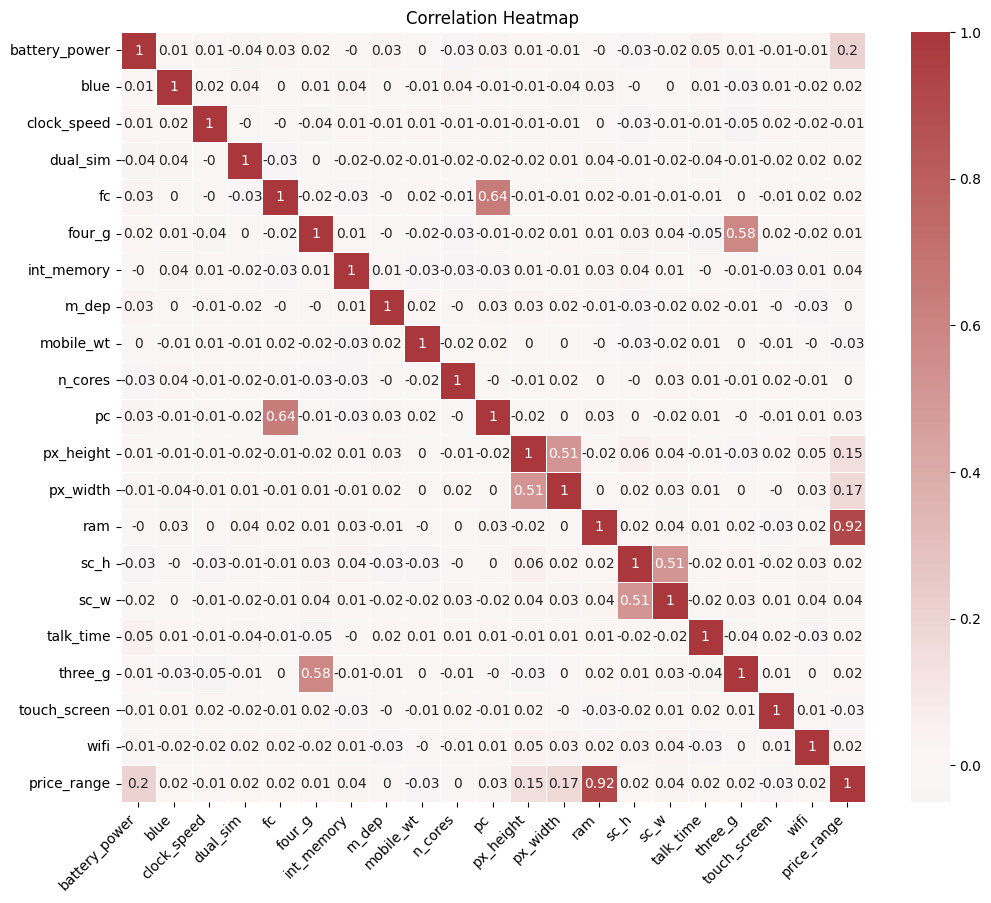

In [22]:
# Create heatmap for the df
plt.figure(figsize=(12, 10))
corr_matrix = df.corr().round(2)
sns.heatmap(corr_matrix, annot=True, cmap='vlag', center=0, linewidths=0.5, linecolor='white')
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

Text(0, 0.5, 'RAM')

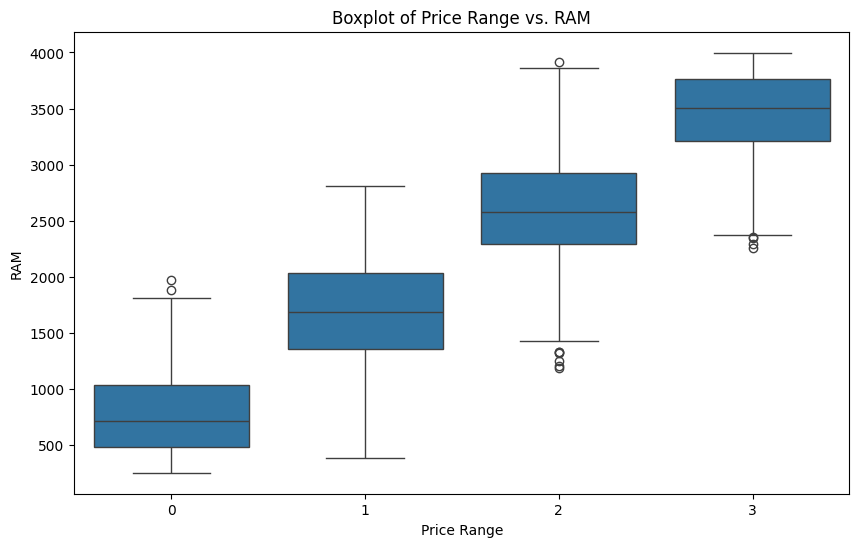

In [24]:
# Create boxplot for price_range and ram
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='ram', data=df)
plt.title('Boxplot of Price Range vs. RAM')
plt.xlabel('Price Range')
plt.ylabel('RAM')

Text(0, 0.5, 'Screen Height')

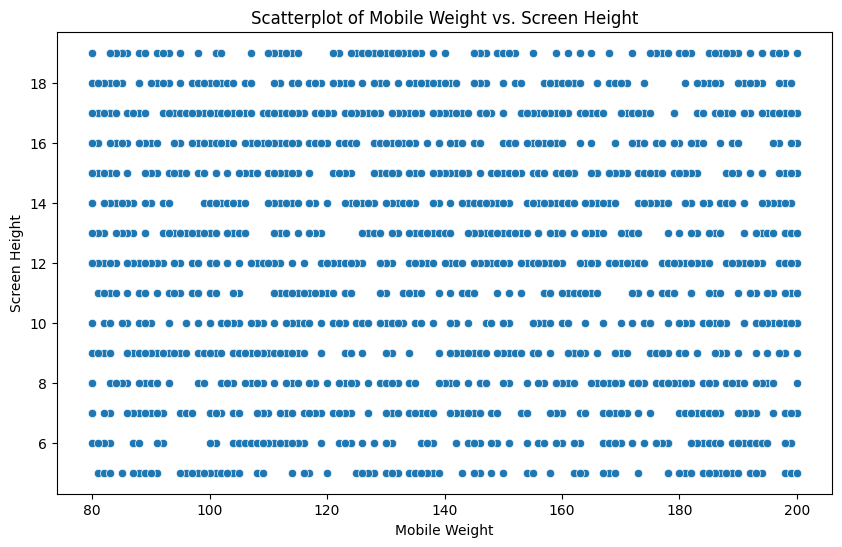

In [27]:
# Create scatterplot for mobile_wt and sc_h
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mobile_wt', y='sc_h', data=df)
plt.title('Scatterplot of Mobile Weight vs. Screen Height')
plt.xlabel('Mobile Weight')
plt.ylabel('Screen Height')

Text(0, 0.5, 'Frequency')

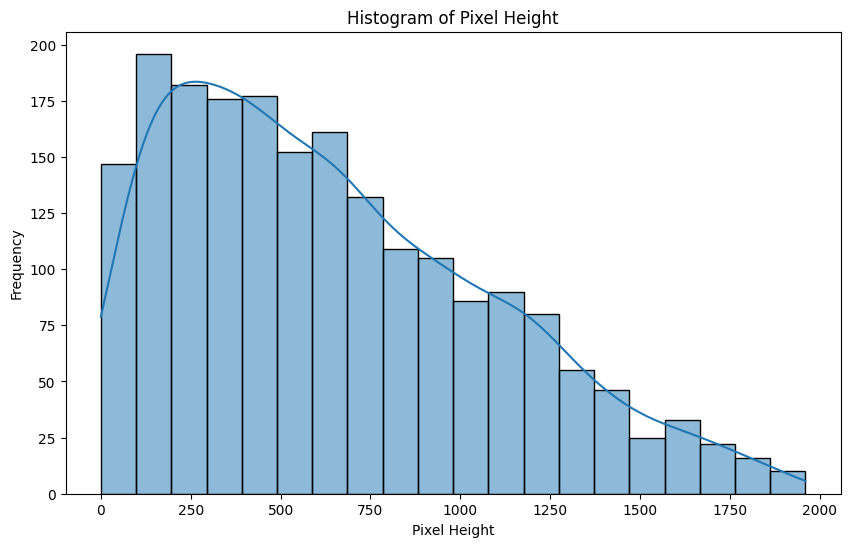

In [29]:
# create a histogram pc_heigh vs frequency
plt.figure(figsize=(10, 6))
sns.histplot(df['px_height'], bins=20, kde=True)
plt.title('Histogram of Pixel Height')
plt.xlabel('Pixel Height')
plt.ylabel('Frequency')


**Correlation Analysis:**

Strong correlations exist between RAM and price range, as well as between certain camera specifications and connectivity features.

Moderate correlations are observed between battery power and price range, indicating its importance in determining phone pricing.

Other features show either weak correlations or no significant correlation with price range, suggesting their limited impact on pricing decisions.

**Variance Analysis:**

Features like Bluetooth, Clock Speed, Mobile Depth, Dual SIM, 4G, 3G, Touch Screen, and WiFi show minimal variability across the dataset.

This indicates that these features are common across different price ranges and may not heavily influence price classification.

Battery Power Distribution: There is a noticeable trend of higher battery capacities in very high-cost phones compared to low-cost ones.

This suggests that premium-priced phones often offer larger battery capacities to support enhanced performance and longer usage times.

**Differences Across Price Categories:**

Significant variations are observed in features such as internal memory, RAM, battery power, and camera specifications across different price categories.

This highlights the diverse range of features available in phones across various price segments.